In [8]:
import os
import numpy as np
from sklearn.datasets import  load_iris
data = load_iris()['data']
data[:4]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2]])

In [3]:
def get_data(path='iris.data.txt'):
    with open(path,'r') as f:
        data = []
        for i in f.readlines():
            line = [j.strip() for j in i.split(',')[:4]]
            try:
                temp = [float(i) for i in line]
            except:     # nice 利用异常机制 捕获这种错误。
                print(line)
                continue
            data.append(temp)
        return data

In [5]:
dm = np.mean(data, axis=0)
nd = data - dm
cov = 1 / len(nd) * np.matmul(nd.T, nd)  # 构造协方差矩阵 
## covMat = np.cov(meanRemoved, rowvar=0) #直接构建协方差矩阵。
print(cov)

[[ 0.68112222 -0.04215111  1.26582     0.51282889]
 [-0.04215111  0.18871289 -0.32745867 -0.12082844]
 [ 1.26582    -0.32745867  3.09550267  1.286972  ]
 [ 0.51282889 -0.12082844  1.286972    0.57713289]]


In [6]:
from numpy import linalg
eigVals, eigVects = linalg.eig(cov)
eigVects[:, :2]

array([[ 0.36138659, -0.65658877],
       [-0.08452251, -0.73016143],
       [ 0.85667061,  0.17337266],
       [ 0.3582892 ,  0.07548102]])

In [7]:
# pnd 为取前两个主成分的数据
pnd = np.matmul(nd, eigVects[:,:2])
# pnd+dm - data
pnd = np.asarray(pnd)
# 数据重构
recondata = np.matmul(pnd, eigVects[:,:2].T) + dm
recondata[:4]

array([[5.08303897, 3.51741393, 1.40321372, 0.21353169],
       [4.7462619 , 3.15749994, 1.46356177, 0.24024592],
       [4.70411871, 3.1956816 , 1.30821697, 0.17518015],
       [4.6422117 , 3.05696697, 1.46132981, 0.23973218]])

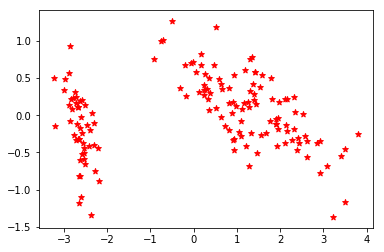

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(pnd[:,0], pnd[:,1], color='r', marker='*')

In [15]:
from numpy import *
def pca(dataMat, topNfeat=9999999):
    meanVals = mean(dataMat, axis=0)
    meanRemoved = dataMat - meanVals 
    covMat = np.cov(meanRemoved, rowvar=0)
    eigVals, eigVects = linalg.eig(mat(covMat))
    eigValInd = argsort(eigVals)             #sort, sort goes smallest to largest
    eigValInd = eigValInd[ : -(topNfeat+1) : -1]  #cut off unwanted dimensions
    redEigVects = eigVects[:, eigValInd]       #reorganize eig vects largest to smallest
    lowDDataMat = meanRemoved * redEigVects#transform data into new dimensions
    reconMat = (lowDDataMat * redEigVects.T) + meanVals
    return lowDDataMat, reconMat
lowd, rm = pca(data, topNfeat=2)

In [16]:
def replaceNanWithMean(): 
    datMat = loadDataSet('secom.data', ' ')
    numFeat = shape(datMat)[1]
    for i in range(numFeat):
        meanVal = mean(datMat[nonzero(~isnan(datMat[:,i].A))[0],i]) #values that are not NaN (a number)
        datMat[nonzero(isnan(datMat[:,i].A))[0],i] = meanVal  #set NaN values to mean
    return datMat